In [1]:
import os as OS
import sys as SYS       #--- Setting for self-made modules
SYS.path.insert(0, OS.path.join('..','Resources'))  #---
import csv as CSV
import pandas as PD
import requests as REQ
import json as JSON
import gmaps as GMAP    #--- Google map plugin

from IPython.display import Image
from config import api_key_gmap as KEY1
from config import api_key_gplaces as KEY2

## Function(s)

In [2]:
# --- This function requests hotel (place) details from Google Places API
# --- returns responded data in Dict. contains 'name', 'city' and 'country'
# --- Place id must be passed when calls or empty Dict returned
def get_place_details(id):
    try:
        url=f'https://maps.googleapis.com/maps/api/place/details/json?place_id={id}&fields=name,address_component&key={KEY2}'
        json_response = REQ.get(url).json()
        name = json_response['result']['name']
        address_components = json_response['result']['address_components']
        for ac in address_components:
            if ac['types'][0]=='administrative_area_level_2':
                city = ac['short_name']
            elif ac['types'][0]=='country':
                country = ac['long_name']
        return_dict = {'name':name, 'city':city, 'country':country}
    except:
        return_dict = {}
    
    return return_dict

## Cities Weather DataFrame (From WeatherPy)

In [3]:
# --- Get weather data set from WeatherPy CSV file
# --- and convert data to appropriate data type
file_path = OS.path.join('..','WeatherPy','Output','sample_city_weather.csv')
with open(file_path, 'r') as csv_file:
    sample_city_df = PD.DataFrame(CSV.reader(csv_file, delimiter=','))

sample_city_df.columns = sample_city_df.loc[0]
sample_city_df = sample_city_df.drop(index=0)
sample_city_df['Latitude'] = sample_city_df['Latitude'].astype(float)
sample_city_df['Longitude'] = sample_city_df['Longitude'].astype(float)
sample_city_df['Temperature'] = sample_city_df['Temperature'].astype(float)
sample_city_df['Humidity'] = sample_city_df['Humidity'].astype(float)
sample_city_df['Cloudiness'] = sample_city_df['Cloudiness'].astype(float)
sample_city_df['Wind Speed (mph)'] = sample_city_df['Wind Speed (mph)'].astype(float)
sample_city_df = sample_city_df.set_index('index_x')
sample_city_df.index.name=None

print(sample_city_df.info())
sample_city_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 611 entries, 7240.0 to 547.0
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           611 non-null    object 
 1   City              611 non-null    object 
 2   Latitude          611 non-null    float64
 3   Longitude         611 non-null    float64
 4   Temperature       611 non-null    float64
 5   Humidity          611 non-null    float64
 6   Cloudiness        611 non-null    float64
 7   Wind Speed (mph)  611 non-null    float64
dtypes: float64(6), object(2)
memory usage: 43.0+ KB
None


,Country,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed (mph)
7240.0,co,restrepo,3.822034,-76.522423,69.80,83.0,40.0,282.0
6798.0,co,cumbitara,1.651744,-77.582248,57.87,100.0,93.0,153.0
14738.0,gy,lethem,3.383333,-59.800000,74.62,84.0,51.0,245.4
6736.0,co,chipaque,4.442500,-74.044167,51.80,93.0,40.0,81.6
6823.0,co,el castillo,3.563629,-73.794885,69.06,69.0,62.0,147.6
24977.0,my,beranang,2.873300,101.869700,89.29,66.0,40.0,282.0
25083.0,my,tampin,2.470100,102.230200,88.00,66.0,20.0,282.0
5200.0,cd,watsa,3.050000,29.533333,65.59,100.0,99.0,119.4
41998.0,ug,mubende,0.589167,31.360000,64.31,57.0,83.0,158.4
39854.0,so,afmadu,0.517222,42.071111,78.39,71.0,94.0,838.8


In [4]:
# --- Google Map configure
GMAP.configure(api_key=KEY1)

## World Humiditiness Heatmap

In [5]:
fig = GMAP.figure(center=(30,20),zoom_level=2, layout={'width': '1050px','height': '700px'})
heatmap_layer = GMAP.heatmap_layer(sample_city_df[['Latitude','Longitude']], weights=sample_city_df['Humidity'])
fig.add_layer(heatmap_layer)
heatmap_layer.max_intensity = 100
heatmap_layer.point_radius = 10
fig

Figure(layout=FigureLayout(height='700px', width='1050px'))

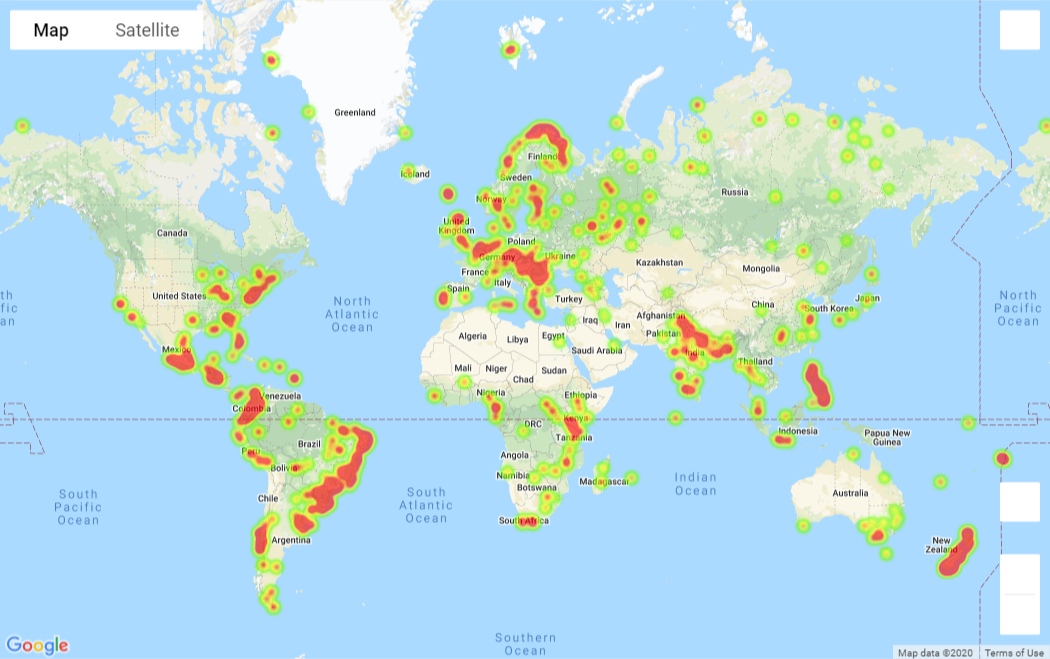

In [6]:
Image("map.png")

## Ideal Weather Filtered Cities DataFrame

In [7]:
# --- Filter for ideal weather cities
ideal_weather_df = sample_city_df[(sample_city_df['Temperature']<90) & (sample_city_df['Temperature']>70)]
ideal_weather_df = ideal_weather_df[(ideal_weather_df['Humidity']<50) & (ideal_weather_df['Humidity']>30)]
ideal_weather_df = ideal_weather_df[ideal_weather_df['Cloudiness']<25]
print(ideal_weather_df.info())
ideal_weather_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 10601.0 to 514.0
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           16 non-null     object 
 1   City              16 non-null     object 
 2   Latitude          16 non-null     float64
 3   Longitude         16 non-null     float64
 4   Temperature       16 non-null     float64
 5   Humidity          16 non-null     float64
 6   Cloudiness        16 non-null     float64
 7   Wind Speed (mph)  16 non-null     float64
dtypes: float64(6), object(2)
memory usage: 1.1+ KB
None


,Country,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed (mph)
10601.0,eg,el balyana,26.238611,32.003056,84.20,42.0,0.0,483.0
13998.0,gr,nea peramos,38.000000,23.433333,79.77,45.0,0.0,201.6
14048.0,gr,orkhomenos,38.500000,22.983333,76.12,47.0,0.0,349.2
6162.0,cn,linxia,35.600278,103.206389,75.18,33.0,14.0,343.8
322.0,am,mrgavan,39.966111,44.533333,86.00,40.0,6.0,201.6
13582.0,gr,gargalianoi,37.066667,21.633333,80.80,44.0,0.0,483.0
38076.0,ru,shaami-yurt,43.226323,45.392033,84.51,45.0,0.0,134.4
39274.0,ru,zilair,52.233200,57.439200,84.83,45.0,24.0,289.8
36084.0,ru,izumrud,56.970100,61.459700,89.60,43.0,20.0,537.0
36392.0,ru,klyuchevsk,57.121600,60.941400,89.60,43.0,20.0,537.0


## Hotels in Ideal Weather Cities Details DataFrame

In [8]:
# -- This cell requests hotels around the filtered ideal weather cities from Google Places API
# -- then call "get_place_details" function to request the hotel details for each hotel
# -- and put responded Hotels and details data in DataFrame "hotel_df"
radius = 5000
search_type = 'hotel'
hotel_df = PD.DataFrame()
for idealx in ideal_weather_df.itertuples():
    location = f"{idealx.Latitude},{idealx.Longitude}"
    url=f'https://maps.googleapis.com/maps/api/place/nearbysearch/json?location={location}&radius={radius}&type={search_type}&keyword=&key={KEY2}'
    json_response = REQ.get(url).json()
    results = json_response['results']
    for x in range(0,len(results)):
        result = results[x]
        place_dict = get_place_details(result['place_id'])      #- calls fuction to request holtel details
        if place_dict != {}:
            hotel_df = hotel_df.append({'Name':place_dict['name']
                                        ,'City':place_dict['city']
                                        ,'Country':place_dict['country']
                                        ,'Latitude':result['geometry']['location']['lat']
                                        ,'Longitude':result['geometry']['location']['lng']}, ignore_index=True)

print(hotel_df.info())
hotel_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       192 non-null    object 
 1   Country    192 non-null    object 
 2   Latitude   192 non-null    float64
 3   Longitude  192 non-null    float64
 4   Name       192 non-null    object 
dtypes: float64(2), object(3)
memory usage: 7.6+ KB
None


,City,Country,Latitude,Longitude,Name
0,Markaz Al Belina,Egypt,26.235438,32.002980,Al Balyana
1,Markaz Al Belina,Egypt,26.235438,32.002980,Post Office - Bani Hamil
2,Markaz Al Belina,Egypt,26.232299,32.000052,El Balina Educational Administration
3,Markaz Al Belina,Egypt,26.238409,32.003133,Post Office - El Boura
4,Markaz Al Belina,Egypt,26.234042,31.996817,El Baliana Central Hospital
5,Markaz Al Belina,Egypt,26.235438,32.002980,Post Office - El Baskeya
6,Markaz Al Belina,Egypt,26.235438,32.002980,Post Office - Bardis
7,Markaz Al Belina,Egypt,26.235438,32.002980,Post Office - El Halafy
8,Markaz Al Belina,Egypt,26.235438,32.002980,Post Office - Manshaet Bardis
9,Markaz Al Belina,Egypt,26.235438,32.002980,Post Office - Nogoua Bardis


## Hotels in Ideal Weather Cities Locations

In [9]:
# --- This cell convert DataFrame to Tuples and List
# --- for Marker Layer using
info_box_template = "<dl><dt> Name </dt><dd>{Name}</dd><dt> City </dt><dd>{City}</dd><dt> Country </dt><dd>{Country}</dd></dl>"
info_box_list = hotel_df[['Name','City','Country']].to_dict('records')
info_box_content = [info_box_template.format(**hotel_city_country) for hotel_city_country in info_box_list]
locations = [tuple(x) for x in round(hotel_df[['Latitude','Longitude']],6).values]

fig2 = fig
fig2.add_layer(GMAP.marker_layer(locations, info_box_content=info_box_content))
fig2

Figure(layout=FigureLayout(height='700px', width='1050px'))

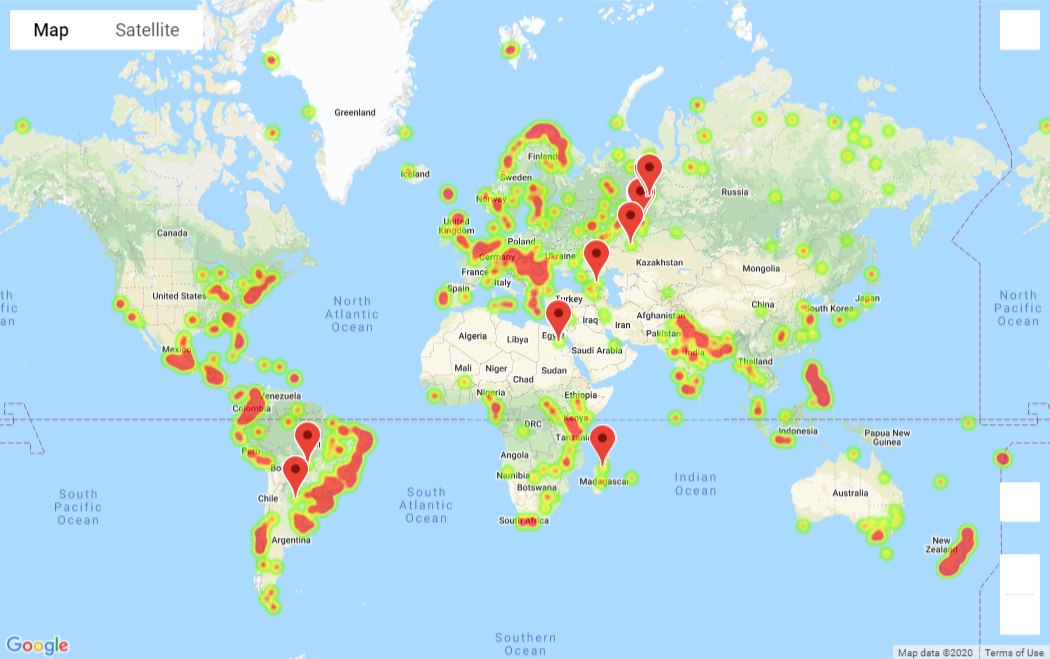

In [10]:
Image("map2.png")